In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

Haveing completed the data management and restructuring process, the next step is to actually define and train the LS-SVM model.
Following the indications of the paper the signal will be computed based on the following function:
$$ y_{t} = LS - SVM(r_{t-1}, EMA_{10t-1}, MACD_{t-1}) $$
Meaning that the 10 lag EMA, the MACD and the Logaritmic return, at time t-1, will be the relevant features onto which the model is going to be trained

In [26]:
# Load your dataset
df = pd.read_csv('../data/BELEX15_.csv')

# Create a y column for the training part
df['y'] = df['price'].pct_change().shift(-1) > 0

# Shift the feature columns to use t-1 metrics
df[['MACD', 'EMA_10', 'Log_Return']] = df[['MACD', 'EMA_10', 'Log_Return']].shift(1)

# Drop the first row as it will have NaN values after shifting
df = df.dropna()

# Select relevant features
X = df[['MACD', 'EMA_10', 'Log_Return']]
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the LS-SVM model
model = SVC(kernel='rbf')
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 51.83%


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3270 entries, 2 to 3271
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        3270 non-null   object 
 1   price       3270 non-null   float64
 2   MACD        3270 non-null   float64
 3   EMA_10      3270 non-null   float64
 4   Log_Return  3270 non-null   float64
 5   y           3270 non-null   bool   
dtypes: bool(1), float64(4), object(1)
memory usage: 156.5+ KB


In [28]:
from trading_signal import compute_trading_signal

In [29]:
compute_trading_signal(df)

,date,price,MACD,EMA_10,Log_Return,y,trading_signal
2,2010-01-13,680.78,0.000000,676.170000,0.022679,True,0
3,2010-01-14,683.71,1.237265,678.990000,-0.015884,True,0
4,2010-01-15,688.32,1.323017,679.315455,0.004295,False,-1
5,2010-01-18,687.54,1.608856,680.114463,0.006720,False,0
6,2010-01-19,684.51,2.182219,681.606379,-0.001134,True,1
...,...,...,...,...,...,...,...
3267,2022-12-23,808.73,0.574644,810.214786,0.002876,True,1
3268,2022-12-26,809.51,0.610939,810.403007,-0.003111,True,0
3269,2022-12-27,809.77,0.431388,810.098824,0.000964,True,0
3270,2022-12-28,811.27,0.348020,809.991765,0.000321,True,0


In [67]:
df.head(50)

,date,price,MACD,EMA_10,Log_Return,y,trading_signal,ls_svm_cumulative_returns,buy_and_hold_returns,buy_and_hold_cumulative_returns,ls_svm_return
0,2010-01-13,680.78,0.000000,676.170000,0.022679,True,1,1.003299,0.022679,1.022679,0.003299
1,2010-01-14,683.71,1.237265,678.990000,-0.015884,True,0,1.003299,-0.015884,1.006434,0.000000
2,2010-01-15,688.32,1.323017,679.315455,0.004295,False,-1,1.003299,0.004295,1.010757,0.000000
3,2010-01-18,687.54,1.608856,680.114463,0.006720,False,0,1.003299,0.006720,1.017549,0.000000
4,2010-01-19,684.51,2.182219,681.606379,-0.001134,True,1,1.002185,-0.001134,1.016395,-0.001110
5,2010-01-20,685.12,2.544344,682.685219,-0.004417,False,-1,1.002185,-0.004417,1.011906,0.000000
6,2010-01-21,682.89,2.557356,683.016997,0.000891,True,1,1.000841,0.000891,1.012807,-0.001341
7,2010-01-22,683.34,2.587067,683.399361,-0.003260,False,-1,1.000841,-0.003260,1.009505,0.000000
8,2010-01-25,681.69,2.402971,683.306750,0.000659,False,0,1.000841,0.000659,1.010170,0.000000
9,2010-01-26,679.36,2.267250,683.312796,-0.002418,True,1,0.999913,-0.002418,1.007728,-0.000927


In [31]:
from compute_return import calculate_cumulative_return

In [32]:
# Example usage:
# Assuming 'data' is your pandas DataFrame with 'trading_signal', 'price', and 'date' columns
# and 'start_date' and 'end_date' are the desired date range.

start_date = '2020-01-02'
end_date = '2022-01-04'

cumulative_return = calculate_cumulative_return(df, start_date, end_date)
print(f"Cumulative Return from {start_date} to {end_date}: {cumulative_return:.2f}%")

Cumulative Return from 2020-01-02 to 2022-01-04: 28.87%


selected start_date 2010-01-13 and end_date2010-01-15
selected start_date 2010-01-19 and end_date2010-01-20
selected start_date 2010-01-21 and end_date2010-01-22
selected start_date 2010-01-26 and end_date2010-01-28
selected start_date 2010-01-29 and end_date2010-02-04
selected start_date 2010-02-05 and end_date2010-02-08
selected start_date 2010-02-09 and end_date2010-02-17
selected start_date 2010-02-18 and end_date2010-02-19
selected start_date 2010-02-24 and end_date2010-02-25
selected start_date 2010-03-01 and end_date2010-03-02
selected start_date 2010-03-05 and end_date2010-03-08
selected start_date 2010-03-09 and end_date2010-03-10
selected start_date 2010-03-11 and end_date2010-03-15
selected start_date 2010-03-17 and end_date2010-03-18
selected start_date 2010-03-25 and end_date2010-04-16
selected start_date 2010-04-19 and end_date2010-04-21
selected start_date 2010-04-22 and end_date2010-04-26
selected start_date 2010-04-29 and end_date2010-04-30
selected start_date 2010-05-

C:\Users\ferol\AppData\Local\Temp\ipykernel_27732\1387500958.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1.003298579531875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[index, 'ls_svm_cumulative_returns'] = 1 * (1+calculate_cumulative_return(df, start_date, end_date)/100)
C:\Users\ferol\AppData\Local\Temp\ipykernel_27732\1387500958.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.0032985795318749567' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[index, 'ls_svm_return'] = calculate_cumulative_return(df, start_date, end_date)/100


selected start_date 2011-06-02 and end_date2011-06-03
selected start_date 2011-06-09 and end_date2011-06-10
selected start_date 2011-06-13 and end_date2011-06-14
selected start_date 2011-06-24 and end_date2011-06-27
selected start_date 2011-06-28 and end_date2011-06-29
selected start_date 2011-06-30 and end_date2011-07-01
selected start_date 2011-07-06 and end_date2011-07-08
selected start_date 2011-07-11 and end_date2011-07-15
selected start_date 2011-07-18 and end_date2011-07-21
selected start_date 2011-07-28 and end_date2011-08-02
selected start_date 2011-08-09 and end_date2011-08-10
selected start_date 2011-08-11 and end_date2011-08-15
selected start_date 2011-08-19 and end_date2011-08-23
selected start_date 2011-08-26 and end_date2011-09-01
selected start_date 2011-09-06 and end_date2011-09-07
selected start_date 2011-09-08 and end_date2011-09-09
selected start_date 2011-09-13 and end_date2011-09-16
selected start_date 2011-10-04 and end_date2011-10-06
selected start_date 2011-10-

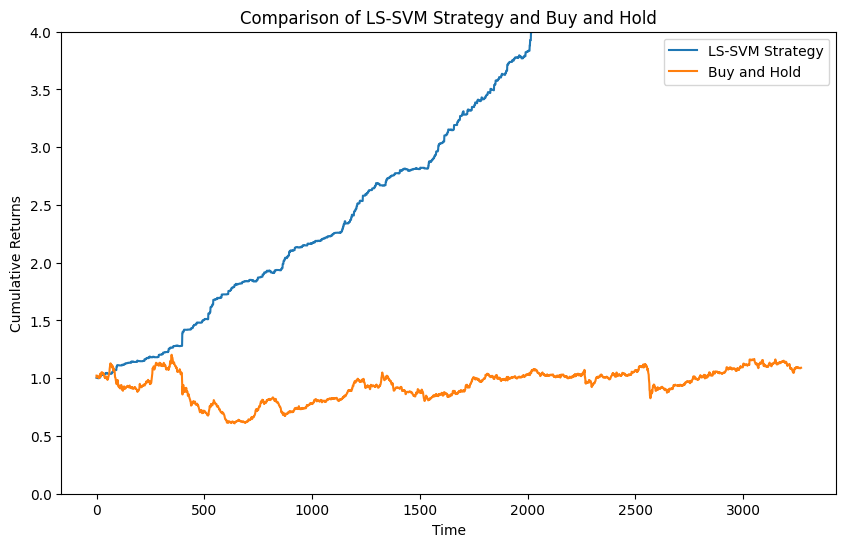

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

df = df.sort_values(by='date').reset_index(drop=True)

df['ls_svm_cumulative_returns'] = 0
df['ls_svm_return'] = 0
df.at[0, 'trading_signal'] = 1

for index, row in df.iterrows():
    if df.at[index, 'trading_signal'] == 1:
        start_date = df.at[index, 'date']
        for i in range(index, len(df)):
            if(df.at[i, 'trading_signal'] == -1):
                end_date = df.at[i, 'date']
                break
        if(index != 0):
            df.at[index, 'ls_svm_cumulative_returns'] = df.at[index-1, 'ls_svm_cumulative_returns'] * (1+calculate_cumulative_return(df, start_date, end_date)/100)
        else:
            df.at[index, 'ls_svm_cumulative_returns'] = 1 * (1+calculate_cumulative_return(df, start_date, end_date)/100)
        df.at[index, 'ls_svm_return'] = calculate_cumulative_return(df, start_date, end_date)/100
    else:
        if(index == 0):
            df.at[index, 'ls_svm_cumulative_returns']=0
        else:
            df.at[index, 'ls_svm_cumulative_returns'] = df.at[index-1, 'ls_svm_cumulative_returns']

# Simulate buy-and-hold strategy
df['buy_and_hold_returns'] = df['Log_Return']
df['buy_and_hold_cumulative_returns'] = (1 + df['buy_and_hold_returns']).cumprod()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['ls_svm_cumulative_returns'], label='LS-SVM Strategy')
plt.plot(df['buy_and_hold_cumulative_returns'], label='Buy and Hold')
plt.legend()
plt.title('Comparison of LS-SVM Strategy and Buy and Hold')
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.ylim([0, 4])
plt.show()

#  Results

In [ ]:
# import module
from tabulate import tabulate
 
# assign data
mydata = [
    ["BELEX15", 0, 1], 
    ["CBX10", 1, 2], 
    ["SOFIX", 2, 4], 
    ["S&P500", 3, 4],
    ["S&P600", 3, 5]
]
 
# create header
head = ["Index", "Buy and Hold", "LS-SVM"]
 
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

+---------+----------------+----------+
| Index   |   Buy and Hold |   LS-SVM |
+=========+================+==========+
| BELEX15 |              0 |        1 |
+---------+----------------+----------+
| CBX10   |              1 |        2 |
+---------+----------------+----------+
| SOFIX   |              2 |        4 |
+---------+----------------+----------+
| S&P500  |              3 |        4 |
+---------+----------------+----------+
| S&P600  |              3 |        5 |
+---------+----------------+----------+
